In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Cargar datos

In [2]:
x_entreno = np.load('images2.npy')
x_entreno

array([[[0.12026144, 0.12026144, 0.12810458, ..., 0.16470588,
         0.16078431, 0.16078431],
        [0.12941176, 0.13202614, 0.1372549 , ..., 0.16862745,
         0.16862745, 0.16862745],
        [0.13986928, 0.13856209, 0.13856209, ..., 0.17254902,
         0.17385621, 0.17254902],
        ...,
        [0.20653595, 0.09934641, 0.10065359, ..., 0.73202614,
         0.7254902 , 0.72941176],
        [0.2496732 , 0.17777778, 0.1124183 , ..., 0.76862745,
         0.79346405, 0.80522876],
        [0.27058824, 0.25228758, 0.17647059, ..., 0.79215686,
         0.82091503, 0.8379085 ]],

       [[0.70588235, 0.70980392, 0.70980392, ..., 0.67973856,
         0.67581699, 0.66797386],
        [0.71764706, 0.72156863, 0.72156863, ..., 0.68366013,
         0.67973856, 0.67712418],
        [0.73333333, 0.73333333, 0.73333333, ..., 0.66143791,
         0.65751634, 0.65882353],
        ...,
        [0.40915033, 0.28888889, 0.45098039, ..., 0.29411765,
         0.41045752, 0.48888889],
        [0.4

In [3]:
x_entreno.shape

(10000, 32, 32)

In [4]:
x_entreno = x_entreno.reshape(-1, 32, 32, 1)*2-1


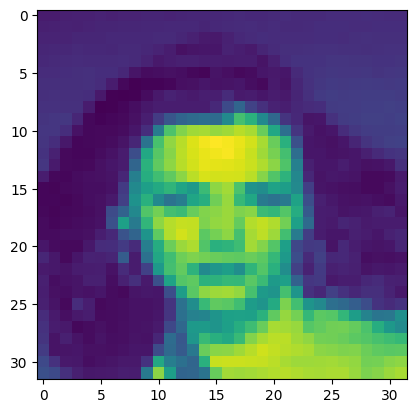

In [5]:
#En Jupyter NB funciona esto para ver una imagen
n = 0
plt.imshow(x_entreno[n])

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Dropout, LeakyReLU, Flatten, BatchNormalization, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

## Creacion del GAN

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

# Tamaño de la capa que va hacia el 
#    Generador
CODE_SIZE = 100

### GENERADOR

In [8]:

generator = Sequential()
generator.add(Dense(8 * 8 * 128, 
                    input_shape=[CODE_SIZE]))
generator.add(Reshape([8, 8, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, 
                              kernel_size=5, 
                              strides=2, 
                              padding="same", 
                              activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, 
                              kernel_size=5, 
                              strides=2, 
                              padding="same", 
                              activation="tanh"))


### DISCRIMINADOR

In [9]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              827392    
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       204864    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

In [10]:
discriminador = Sequential()
discriminador.add(Conv2D(64, 
                         kernel_size = 5, 
                         strides = 2, 
                         padding = "same",
                         activation = LeakyReLU(0.3),
                         input_shape = [32, 32, 1]))
discriminador.add(Dropout(0.5))
discriminador.add(Conv2D(128, 
                         kernel_size = 5, 
                         strides = 2, 
                         padding = "same",
                         activation = LeakyReLU(0.3)))
discriminador.add(Dropout(0.5))
discriminador.add(Flatten())
discriminador.add(Dense(1, 
                        activation = "sigmoid"))

In [11]:
discriminador.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-tr

In [13]:
GAN = Sequential([generator, discriminador])

In [14]:
discriminador.compile(loss="binary_crossentropy", optimizer="adam")
discriminador.trainable = False

Compilar GAN 

In [15]:
GAN.compile(loss = "binary_crossentropy", 
            optimizer = "adam")

In [16]:
GAN.layers

In [17]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 1)         1034625   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 214785    
                                                                 
Total params: 1,249,410
Trainable params: 1,034,241
Non-trainable params: 215,169
_________________________________________________________________


In [20]:
import tensorflow as tf

In [21]:
BATCH_SIZE = 32

In [22]:
datos = tf.data.Dataset.from_tensor_slices(x_entreno).shuffle(buffer_size = 1000)

In [23]:
type(datos)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [24]:
datos = datos.batch(BATCH_SIZE, 
                    drop_remainder = True).prefetch(1)

In [26]:
EPOCHS = 50

In [25]:
generador, discriminador = GAN.layers

In [29]:
for epoca in range(EPOCHS):
    print(f"Voy por la época {epoca + 1}")
    i = 0
    # Para cada tanda en el conjunto de datos
    for X_tanda in datos:
        i = i + 1
        if i % 25 == 0:
            print(f"\tVoy por la tanda número {i} de {len(x_entreno) // BATCH_SIZE}")
            
        ##############################################
        ## Fase 1 - Entrenamiento del DISCRIMINADOR ##
        ##############################################
        
        # Crear Ruido
        ruido = tf.random.normal(shape = [BATCH_SIZE, 
                                          CODE_SIZE])
        
        # Generar imágenes falsas (números) basadas sólo en una entrada de ruido
        # Notar que el Generador nunca vé imágenes reales (solo ruido)
        imagenes_gen = generador(ruido)
        
        # Concatenar las Imágenes Generadas con las Verdaderas
        # Para poder utilizar tf.concat, los tipos de los datos deben
        #    coincidir!
        X_falso_vs_real = tf.concat([imagenes_gen, 
                                     tf.dtypes.cast(X_tanda,
                                                    tf.float32)], 
                                    axis = 0)
        
        # Las metas se fijan en cero (0) para imágenes falsas 
        #     y uno (1) para imágenes reales
        y1 = tf.constant([[0.]] * BATCH_SIZE + [[1.]] * BATCH_SIZE)
        
        # La siguiente instrucción obvia una advertencia de Keras
        discriminador.trainable = True
        
        # Entrenar al discriminador con esta tanda
        discriminador.train_on_batch(X_falso_vs_real, y1)
        
        
        ##########################################
        ## Fase 2 - Entrenamiento del GENERADOR ##
        ##########################################
        
        # Crear algo de ruido
        ruido = tf.random.normal(shape=[BATCH_SIZE, 
                                        CODE_SIZE])
        
        # Se quiere que el discriminador crea 
        #   que las imágenes falas son reales
        y2 = tf.constant([[1.]] * BATCH_SIZE)
        
        # Evitar una advertencia
        discriminador.trainable = False
        
        GAN.train_on_batch(ruido, y2)
        
print("Entrenamiento Completado")            

Voy por la época 1
	Voy por la tanda número 25 de 312
	Voy por la tanda número 50 de 312
	Voy por la tanda número 75 de 312
	Voy por la tanda número 100 de 312
	Voy por la tanda número 125 de 312
	Voy por la tanda número 150 de 312
	Voy por la tanda número 175 de 312
	Voy por la tanda número 200 de 312
	Voy por la tanda número 225 de 312
	Voy por la tanda número 250 de 312
	Voy por la tanda número 275 de 312
	Voy por la tanda número 300 de 312
Voy por la época 2
	Voy por la tanda número 25 de 312
	Voy por la tanda número 50 de 312
	Voy por la tanda número 75 de 312
	Voy por la tanda número 100 de 312
	Voy por la tanda número 125 de 312
	Voy por la tanda número 150 de 312
	Voy por la tanda número 175 de 312
	Voy por la tanda número 200 de 312
	Voy por la tanda número 225 de 312
	Voy por la tanda número 250 de 312
	Voy por la tanda número 275 de 312
	Voy por la tanda número 300 de 312
Voy por la época 3
	Voy por la tanda número 25 de 312
	Voy por la tanda número 50 de 312
	Voy por la tan